In [25]:
import pandas as pd

# Chargement du fichier (corriger l'encodage si nécessaire)
df_transactions = pd.read_csv("../data_cleaned/laverie1/transactions_transaction_cleaned.csv", encoding='utf-8', sep=',')
df_jour = pd.read_csv("../data_cleaned/laverie1/transactions_jour_cleaned.csv", encoding='utf-8', sep=',')

# Renommer les colonnes si elles sont mal encodées
#df.columns = [col.encode('latin1').decode('utf-8') for col in df.columns]




In [26]:
# Conversion des colonnes utiles
df_transactions['datetime'] = pd.to_datetime(df_transactions['date/heure(europe/paris)'], errors='coerce')
df_transactions['prix'] = pd.to_numeric(df_transactions['prix'], errors='coerce')

# Supprimer les lignes avec des dates ou prix manquants
df_transactions = df_transactions.dropna(subset=['datetime', 'prix'])

# Ajouter une colonne mois et jour
df_transactions['mois'] = df_transactions['datetime'].dt.to_period('M')
df_transactions['jour'] = df_transactions['datetime'].dt.date

## Statistiques générales pour Laverie 1

In [27]:
# 1. Nombre total de transactions
nombre_transactions = df_transactions.shape[0]

# 2. Chiffre d’affaires mensuel global
ca_mensuel = df_transactions.groupby('mois')['prix'].sum()

# 3. Moyenne de chiffre d'affaires par jour
ca_par_jour = df_transactions.groupby('jour')['prix'].sum()
moyenne_ca_jour = ca_par_jour.mean()

# 4. Moyenne par transaction
moyenne_ca_transaction = df_transactions['prix'].mean()

# Affichage
print("Nombre total de transactions :", nombre_transactions)
print("Chiffre d'affaires mensuel global :")
print(ca_mensuel)
print("Moyenne du CA par jour :", round(moyenne_ca_jour, 2), "€")
print("Moyenne du CA par transaction :", round(moyenne_ca_transaction, 2), "€")


Nombre total de transactions : 6611
Chiffre d'affaires mensuel global :
mois
2025-01    4744.9
2025-02    4307.4
2025-03    4202.5
2025-04    4110.1
2025-05    4155.3
2025-06    3849.7
Freq: M, Name: prix, dtype: float64
Moyenne du CA par jour : 140.17 €
Moyenne du CA par transaction : 3.84 €


## CA mensuel

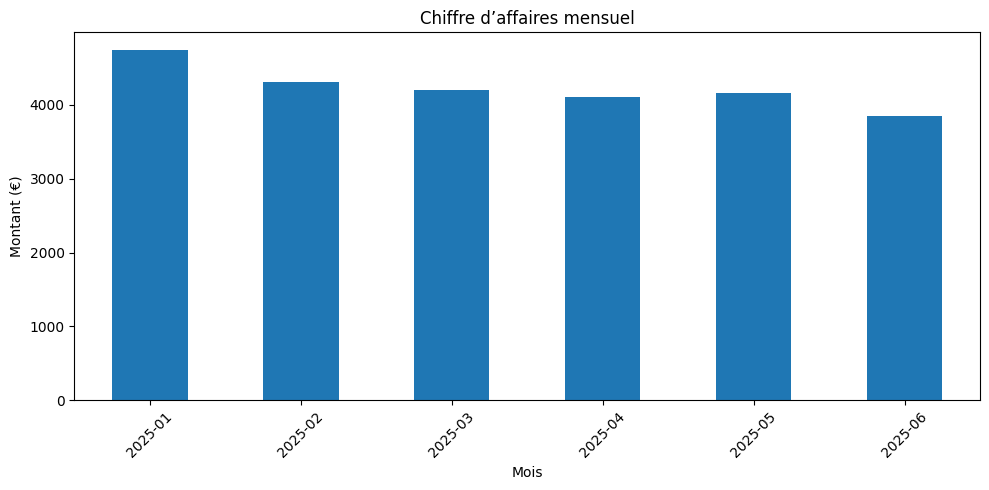

In [28]:
import matplotlib.pyplot as plt

ca_mensuel.plot(kind='bar', figsize=(10,5), title='Chiffre d’affaires mensuel')
plt.ylabel('Montant (€)')
plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### A. Nombre moyen de jours par mois

In [29]:
# Chargement des données
df = pd.read_csv("../data_cleaned/laverie1/transactions_jour_cleaned.csv", parse_dates=['date'])
# Total de jours analysés
total_days = df['date'].nunique()

# Nombre de mois couverts
df['month'] = df['date'].dt.to_period('M')
total_months = df['month'].nunique()

print(f"Total de jours analysés : {total_days}")
print(f"Nombre de mois couverts : {total_months}")
print(f"Moyenne de jours par mois : {total_days / total_months:.2f}")


Total de jours analysés : 181
Nombre de mois couverts : 6
Moyenne de jours par mois : 30.17


#### B. Chiffre d'affaires global & détaillé

In [30]:
# CA global
ca_total = df['ca_tot'].sum()
print(f"CA total sur la période : {ca_total:.2f} €")

# CA moyen par jour
ca_moyen_jour = df['ca_tot'].mean()
print(f"CA moyen / jour : {ca_moyen_jour:.2f} €")

# CA moyen par mois
ca_par_mois = df.groupby(df['date'].dt.to_period('M'))['ca_tot'].sum()
ca_moyen_mois = ca_par_mois.mean()
print(f"CA moyen / mois : {ca_moyen_mois:.2f} €")

# Mois avec le CA le plus élevé
mois_max = ca_par_mois.idxmax()
valeur_max = ca_par_mois.max()
print(f"CA max observé : {valeur_max:.2f} € en {mois_max}")


CA total sur la période : 25264.90 €
CA moyen / jour : 139.59 €
CA moyen / mois : 4210.82 €
CA max observé : 4715.90 € en 2025-01


#### Graphique : évolution du CA mensuel

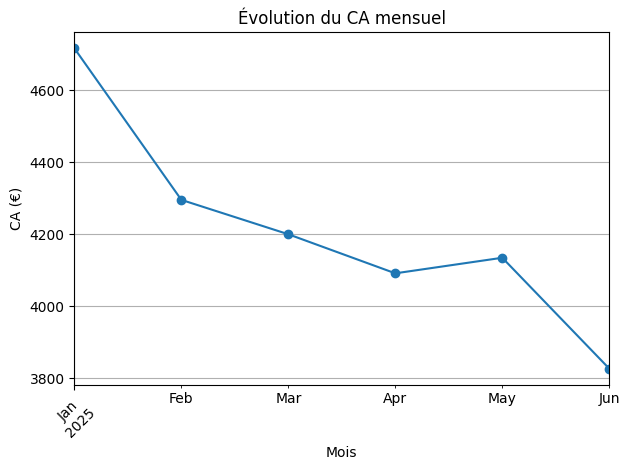

In [31]:
ca_par_mois.plot(kind='line', marker='o', title="Évolution du CA mensuel", ylabel="CA (€)", xlabel="Mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### C. Répartition par mode de paiement

In [32]:
# Totaux par mode
total_esp = df['ca_esp'].sum()
total_cb = df['ca_cb'].sum()
total_jeton = df['jeton'].sum()
total_fidelite = df['fidelite'].sum()

# Répartition en pourcentage
total_global = total_esp + total_cb + total_jeton + total_fidelite
part_esp = total_esp / total_global * 100
part_cb = total_cb / total_global * 100
part_jeton = total_jeton / total_global * 100


# Affichage
print(f"Répartition des paiements :")
print(f"  - Espèces : {part_esp:.2f}%")
print(f"  - Carte : {part_cb:.2f}%")
print(f"  - Jetons : {part_jeton:.2f}%")


Répartition des paiements :
  - Espèces : 40.30%
  - Carte : 59.70%
  - Jetons : 0.00%


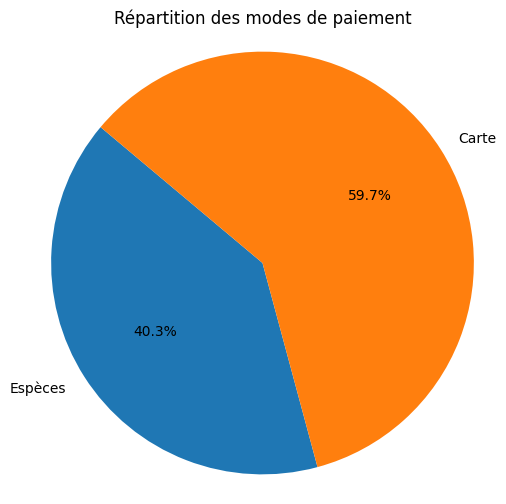

In [33]:
# 📊 Camembert
plt.figure(figsize=(6,6))
plt.pie(
    [total_esp, total_cb],
    labels=['Espèces', 'Carte'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Répartition des modes de paiement")
plt.axis('equal')
plt.show()


#### D. Évolution du nombre de jours avec transactions par mois

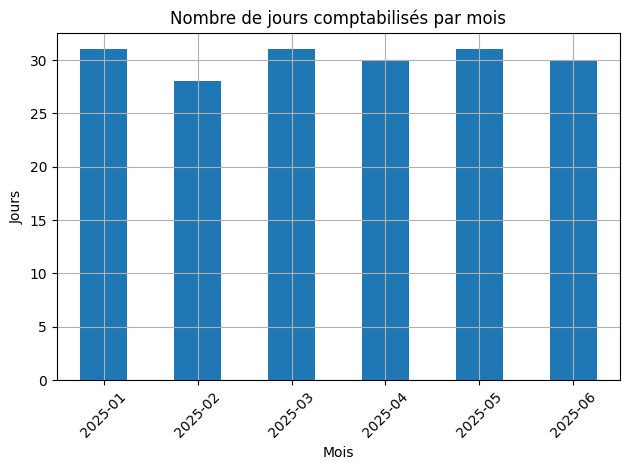

In [34]:
jours_par_mois = df.groupby('month')['date'].count()
jours_par_mois.plot(kind='bar', title="Nombre de jours comptabilisés par mois", ylabel="Jours", xlabel="Mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers nettoyés
transactions = pd.read_csv("/mnt/data/transactions_transaction_cleaned.csv", parse_dates=["date/heure(europe/paris)"])
transactions_jour = pd.read_csv("/mnt/data/transactions_jour_cleaned.csv", parse_dates=["date"])

# Renommer les colonnes pour simplifier
transactions.rename(columns={"date/heure(europe/paris)": "datetime"}, inplace=True)

# Extraire date, semaine, mois pour les regroupements
transactions["date"] = transactions["datetime"].dt.date
transactions["month"] = transactions["datetime"].dt.to_period("M")
transactions["week"] = transactions["datetime"].dt.to_period("W")

# A. Nombre total et moyen de transactions
total_transactions = len(transactions)
transactions_per_day = transactions.groupby("date").size().mean()
transactions_per_week = transactions.groupby("week").size().mean()
transactions_per_month = transactions.groupby("month").size().mean()

# B. Chiffre d’affaires global et détaillé
ca_total = transactions_jour["ca_tot"].sum()
ca_jour = transactions_jour["ca_tot"].mean()
ca_semaine = transactions_jour.groupby(transactions_jour["date"].dt.to_period("W"))["ca_tot"].sum().mean()
ca_mois = transactions_jour.groupby(transactions_jour["date"].dt.to_period("M"))["ca_tot"].sum().mean()
ca_par_transaction = ca_total / total_transactions

ca_mensuel = transactions_jour.groupby(transactions_jour["date"].dt.to_period("M"))["ca_tot"].sum()
ca_max = ca_mensuel.max()
mois_max = ca_mensuel.idxmax()

# C. Répartition par mode de paiement (en valeur et en volume)
total_esp = transactions["pièce"].fillna(0).sum() + transactions["billet"].fillna(0).sum()
total_cb = transactions["carte_bancaire"].fillna(0).sum()
total_fidelite = transactions["fidélitée"].fillna(0).sum()

total_paiement = total_esp + total_cb + total_fidelite

# Répartition des transactions par type de paiement
esp_tx = (transactions["pièce"].fillna(0) + transactions["billet"].fillna(0)) > 0
cb_tx = transactions["carte_bancaire"].fillna(0) > 0
fidelite_tx = transactions["fidélitée"].fillna(0) > 0

nb_esp = esp_tx.sum()
nb_cb = cb_tx.sum()
nb_fidelite = fidelite_tx.sum()

# D. Distribution temporelle basique
jour_plus_frequent = transactions["datetime"].dt.day_name().value_counts().idxmax()
mois_plus_frequent = transactions["datetime"].dt.month_name().value_counts().idxmax()
transactions_mensuelles = transactions.groupby("month").size()

# E. Valeur par transaction
valeurs = transactions["prix"].dropna()
val_min = valeurs.min()
val_max = valeurs.max()
val_moy = valeurs.mean()
val_med = valeurs.median()
pct_bas = (valeurs < 3).mean() * 100
pct_haut = (valeurs > 10).mean() * 100

# F. Taux de croissance
tx_croissance_ca = ca_mensuel.pct_change().dropna()
tx_croissance_tx = transactions_mensuelles.pct_change().dropna()

ratio_ca = ca_mensuel.iloc[-1] / ca_mensuel.iloc[0]
ratio_tx = transactions_mensuelles.iloc[-1] / transactions_mensuelles.iloc[0]

# Résumé des résultats statistiques
summary = {
    "total_transactions": total_transactions,
    "transactions_per_day": transactions_per_day,
    "transactions_per_week": transactions_per_week,
    "transactions_per_month": transactions_per_month,
    "ca_total": ca_total,
    "ca_par_transaction": ca_par_transaction,
    "ca_moy_jour": ca_jour,
    "ca_moy_semaine": ca_semaine,
    "ca_moy_mois": ca_mois,
    "ca_max": ca_max,
    "mois_max": str(mois_max),
    "total_espèces": total_esp,
    "total_cb": total_cb,
    "total_fidélité": total_fidelite,
    "nb_tx_espèces": nb_esp,
    "nb_tx_cb": nb_cb,
    "nb_tx_fidélité": nb_fidelite,
    "jour_plus_frequent": jour_plus_frequent,
    "mois_plus_frequent": mois_plus_frequent,
    "val_min": val_min,
    "val_max": val_max,
    "val_moy": val_moy,
    "val_med": val_med,
    "pct_tx_bas_montant": pct_bas,
    "pct_tx_haut_montant": pct_haut,
    "tx_croissance_ca_moy": tx_croissance_ca.mean(),
    "tx_croissance_tx_moy": tx_croissance_tx.mean(),
    "ratio_ca_debut_fin": ratio_ca,
    "ratio_tx_debut_fin": ratio_tx
}

summary
